<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_AML_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/Program_2_Dataset.csv')

In [72]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [73]:
df.shape

(506, 14)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [75]:
df.describe

<bound method NDFrame.describe of      Crime_Rate  Zone_proportion  Non_Retail_Acres  CHAS    NOX  Avg_rooms  \
0       0.06860              0.0              2.89     0  0.445      7.416   
1       0.14866              0.0              8.56     0  0.520      6.727   
2       0.11432              0.0              8.56     0  0.520      6.781   
3       0.22876              0.0              8.56     0  0.520      6.405   
4       0.21161              0.0              8.56     0  0.520      6.137   
..          ...              ...               ...   ...    ...        ...   
501    12.80230              0.0             18.10     0  0.740      5.854   
502    10.67180              0.0             18.10     0  0.740      6.459   
503     6.28807              0.0             18.10     0  0.740      6.341   
504     9.92485              0.0             18.10     0  0.740      6.251   
505     9.32909              0.0             18.10     0  0.713      6.185   

      AGE  Distance  RAD  Pro

In [76]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [77]:
df= df.drop(columns=['Zone_proportion', 'CHAS'], axis=1)

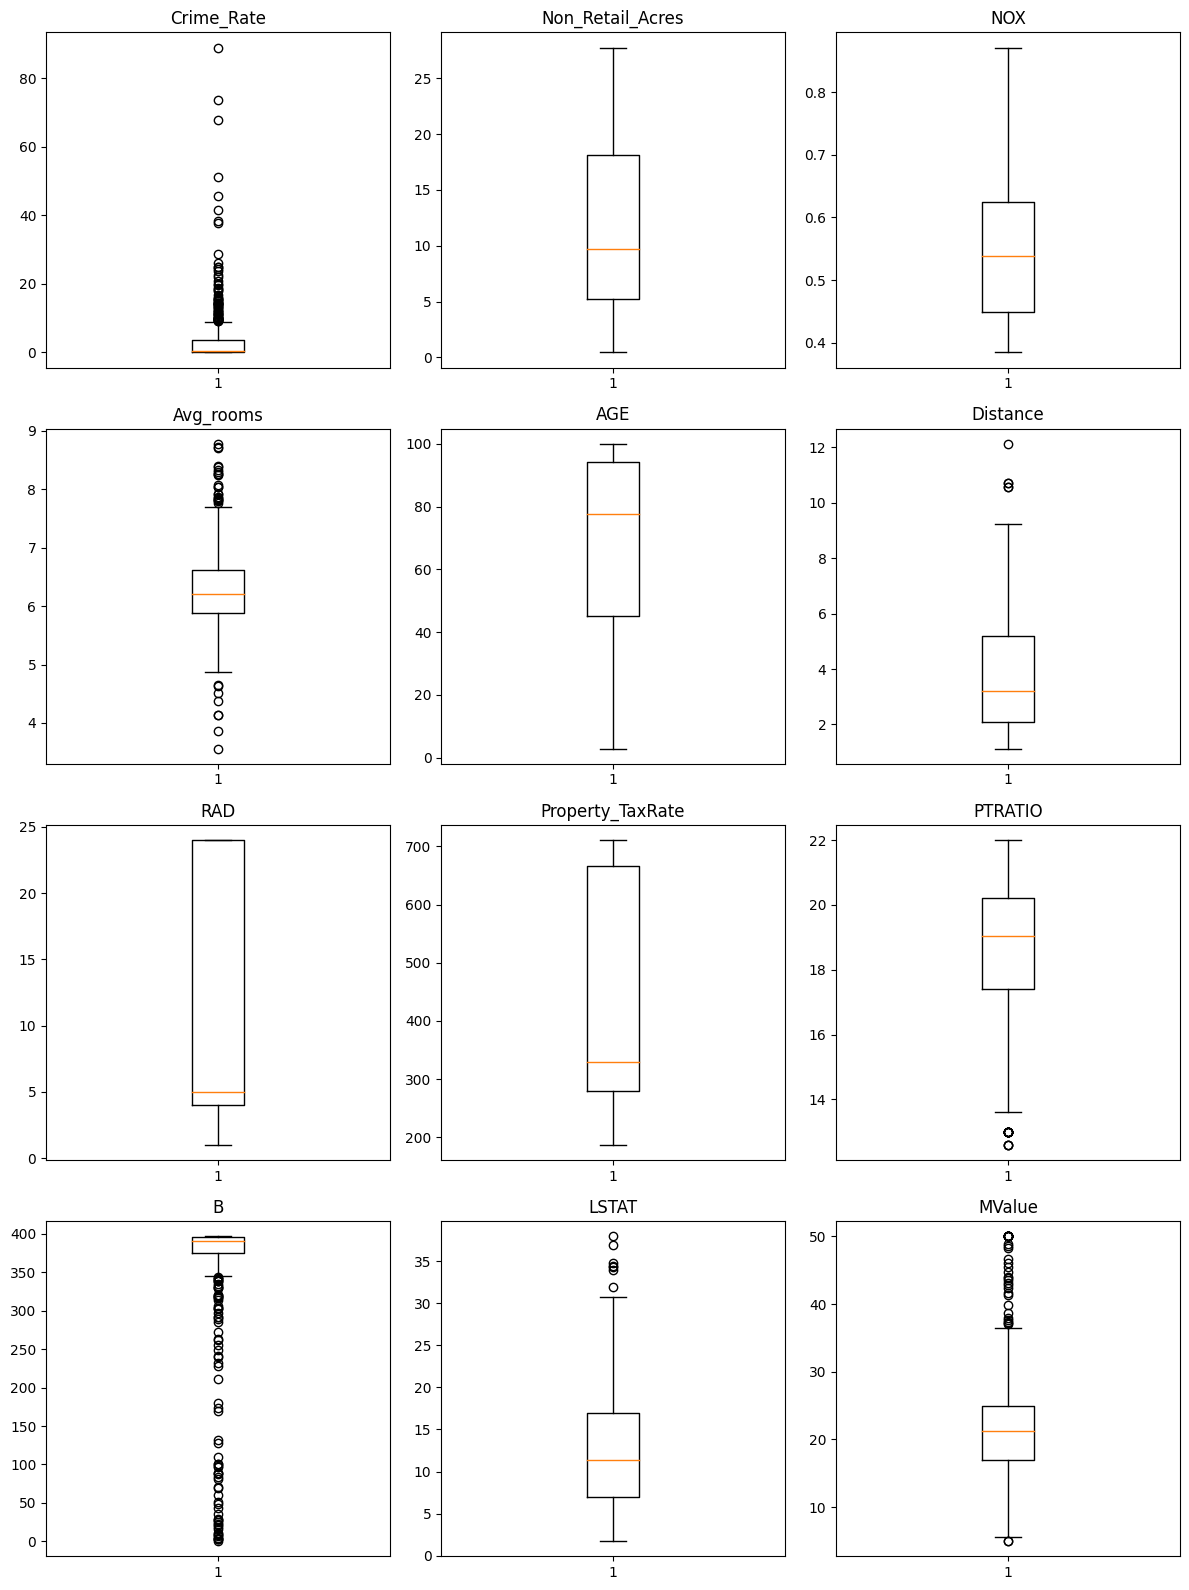

In [78]:
num_attributes = len(df.columns)
num_cols = 3  # You can adjust this value based on your preferences
num_rows = -(-num_attributes // num_cols)  # Ceiling division to ensure enough rows

# Calculate figsize based on the number of rows and columns
fig_width = 4 * num_cols
fig_height = 4 * num_rows

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot boxplots for each attribute
for i, col in enumerate(df.columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [79]:
outliers = np.where(df['Distance']>10)[0]
outliers

array([252, 253, 254, 255, 256])

In [80]:
df.drop(index=outliers, inplace=True)

In [81]:
outliers1 = np.where(df['LSTAT']>30)[0]
outliers1

array([ 42, 269, 270, 280, 281, 283, 284, 351, 400, 464, 466, 490])

In [82]:
df.drop(index=outliers1, inplace=True)

In [84]:
outliers2 = np.where(df['PTRATIO']<13)[0]
outliers2

array([96, 97, 98])

In [85]:
df.drop(index=outliers2, inplace=True)

Data Preprocessing is achieved by removing outlier values from Distance and LSTAT.

In [98]:
features=  ['Avg_rooms','Distance', 'Property_TaxRate' , 'Non_Retail_Acres']

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]

In [112]:
print("VIF values:")
print(vif_data)

VIF values:
            Feature        VIF
0         Avg_rooms  17.511158
1          Distance   7.309168
2  Property_TaxRate  13.758283
3  Non_Retail_Acres   9.432460


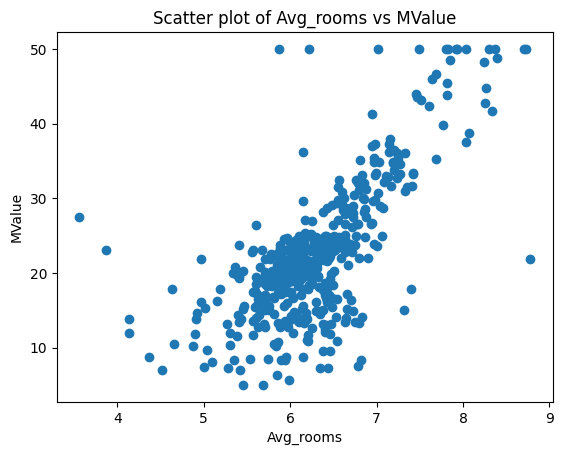

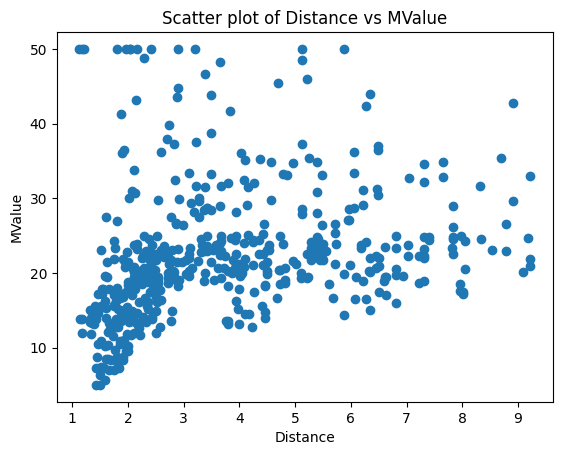

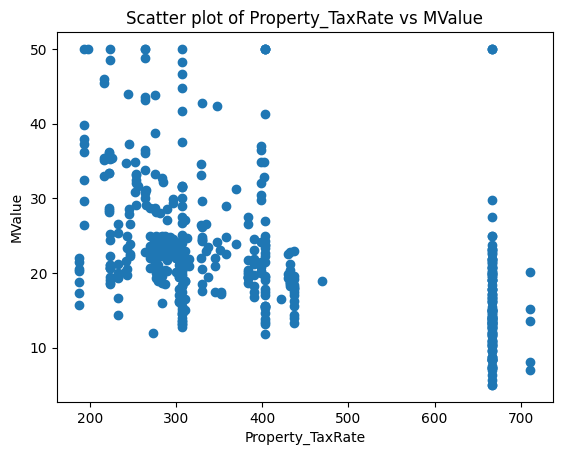

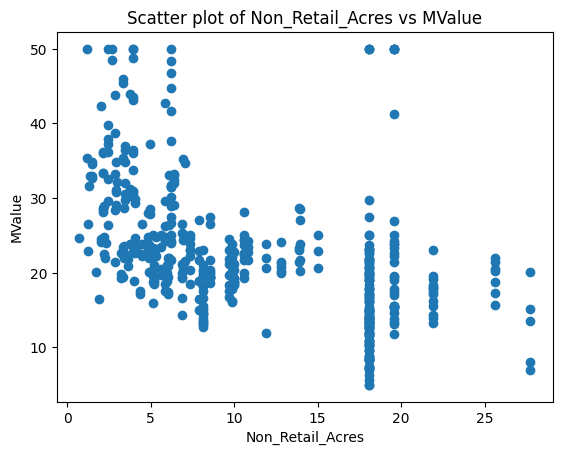

In [113]:
for i in features:
    plt.scatter(df[i], df['MValue'])
    plt.title(f'Scatter plot of {i} vs MValue')
    plt.xlabel(i)
    plt.ylabel('MValue')
    plt.show()

In [106]:
from sklearn.model_selection import train_test_split
X = df[features]
Y = df['MValue']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [110]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [123]:
print("\nCoefficients:")
print(dict(zip(features, linreg.coef_)))
print("\nIntercept:")
print(linreg.intercept_)


Coefficients:
{'Avg_rooms': 7.137243002191816, 'Distance': -0.5543938415749349, 'Property_TaxRate': -0.013963590993045005, 'Non_Retail_Acres': -0.2384311476940758}

Intercept:
-11.946447731807705


In [117]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [118]:
print("Mean Squared Error (Train):", mean_squared_error(Y_train, y_pred_train))
print("\nR-squared (Train):", r2_score(Y_train, y_pred_train))

Mean Squared Error (Train): 28.815503536445746

R-squared (Train): 0.6176143606356976


In [119]:
print("Mean Squared Error (Test):", mean_squared_error(Y_test, y_pred_test))
print("R-squared (Test):", r2_score(Y_test, y_pred_test))

Mean Squared Error (Test): 36.678085160800954
R-squared (Test): 0.6052262654093719
